In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from flow_utils import *
from Plot_utils import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
_csv='/Users/ssa195/Downloads/dt8122-2022-main/datasets/two_blobs.csv'
_data=Dataset2D(csv_file=_csv)
train_dataloader, test_dataloader = get_train_test_loader(_csv)

In [3]:
torch.manual_seed(0)

In [4]:
def make_net():
    return nn.Sequential(nn.Linear(1,32), nn.ReLU(),
                       nn.Linear(32, 32), nn.ReLU(),
                       nn.Linear(32,2))

In [5]:

flow = NVP_flow([

  CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()), ReverseBijection(),
  # CouplingBijection(make_net()), ReverseBijection(),
  # CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()),
]).to(device)

print(flow)

NVP_flow(
  (bijections): ModuleList(
    (0): CouplingBijection(
      (net): Sequential(
        (0): Linear(in_features=1, out_features=32, bias=True)
        (1): ReLU()
        (2): Linear(in_features=32, out_features=32, bias=True)
        (3): ReLU()
        (4): Linear(in_features=32, out_features=2, bias=True)
      )
    )
    (1): ReverseBijection()
    (2): CouplingBijection(
      (net): Sequential(
        (0): Linear(in_features=1, out_features=32, bias=True)
        (1): ReLU()
        (2): Linear(in_features=32, out_features=32, bias=True)
        (3): ReLU()
        (4): Linear(in_features=32, out_features=2, bias=True)
      )
    )
    (3): ReverseBijection()
    (4): CouplingBijection(
      (net): Sequential(
        (0): Linear(in_features=1, out_features=32, bias=True)
        (1): ReLU()
        (2): Linear(in_features=32, out_features=32, bias=True)
        (3): ReLU()
        (4): Linear(in_features=32, out_features=2, bias=True)
      )
    )
    (5): Revers

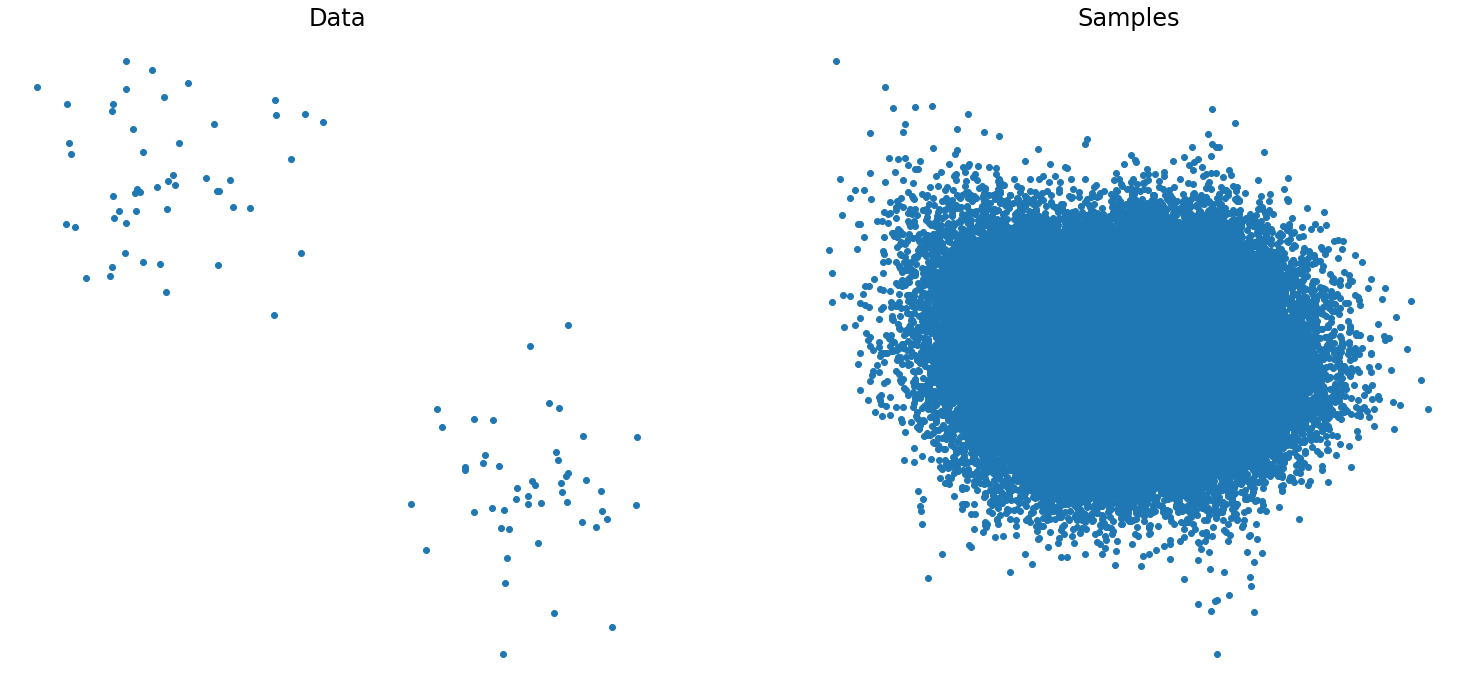

In [6]:
# Plot model samples at initialization
initial_flow=flow.sample(128000)
plot_samples(test_dataloader,initial_flow)

In [17]:
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-4)
epochs = 2000

print('Training...')
flow = flow.train()
for epoch in range(epochs):
    print("epoch:", epoch)
    loss_sum = 0.0
    for i, (x,y,data) in enumerate(train_dataloader):
        data=data.type(torch.FloatTensor).to(device)
        optimizer.zero_grad()
        loss = -flow.log_prob(data).mean().to(device)
        #print("l:",loss)
        loss.backward()
        optimizer.step()
        loss_sum += loss.detach().cpu().item()
    print('Epoch: {}/{}, Loss: {:.3f}'.format(epoch+1, epochs, loss_sum/len(data)))

    if epoch % 5 == 0:
        torch.save(flow, '/Users/ssa195/Downloads/dt8122-2022-main/nvp_trained_2blobs/model.pt')

Training...
epoch: 0
Epoch: 1/2000, Loss: 0.149
epoch: 1
Epoch: 2/2000, Loss: 0.140
epoch: 2
Epoch: 3/2000, Loss: 0.132
epoch: 3
Epoch: 4/2000, Loss: 0.133
epoch: 4
Epoch: 5/2000, Loss: 0.139
epoch: 5
Epoch: 6/2000, Loss: 0.148
epoch: 6
Epoch: 7/2000, Loss: 0.155
epoch: 7
Epoch: 8/2000, Loss: 0.140
epoch: 8
Epoch: 9/2000, Loss: 0.160
epoch: 9
Epoch: 10/2000, Loss: 0.138
epoch: 10
Epoch: 11/2000, Loss: 0.151
epoch: 11
Epoch: 12/2000, Loss: 0.149
epoch: 12
Epoch: 13/2000, Loss: 0.143
epoch: 13
Epoch: 14/2000, Loss: 0.145
epoch: 14
Epoch: 15/2000, Loss: 0.156
epoch: 15
Epoch: 16/2000, Loss: 0.143
epoch: 16
Epoch: 17/2000, Loss: 0.134
epoch: 17
Epoch: 18/2000, Loss: 0.144
epoch: 18
Epoch: 19/2000, Loss: 0.146
epoch: 19
Epoch: 20/2000, Loss: 0.143
epoch: 20
Epoch: 21/2000, Loss: 0.140
epoch: 21
Epoch: 22/2000, Loss: 0.137
epoch: 22
Epoch: 23/2000, Loss: 0.133
epoch: 23
Epoch: 24/2000, Loss: 0.140
epoch: 24
Epoch: 25/2000, Loss: 0.129
epoch: 25
Epoch: 26/2000, Loss: 0.141
epoch: 26
Epoch: 27

Epoch: 211/2000, Loss: 0.137
epoch: 211
Epoch: 212/2000, Loss: 0.150
epoch: 212
Epoch: 213/2000, Loss: 0.133
epoch: 213
Epoch: 214/2000, Loss: 0.139
epoch: 214
Epoch: 215/2000, Loss: 0.137
epoch: 215
Epoch: 216/2000, Loss: 0.135
epoch: 216
Epoch: 217/2000, Loss: 0.126
epoch: 217
Epoch: 218/2000, Loss: 0.134
epoch: 218
Epoch: 219/2000, Loss: 0.138
epoch: 219
Epoch: 220/2000, Loss: 0.129
epoch: 220
Epoch: 221/2000, Loss: 0.129
epoch: 221
Epoch: 222/2000, Loss: 0.124
epoch: 222
Epoch: 223/2000, Loss: 0.136
epoch: 223
Epoch: 224/2000, Loss: 0.139
epoch: 224
Epoch: 225/2000, Loss: 0.134
epoch: 225
Epoch: 226/2000, Loss: 0.123
epoch: 226
Epoch: 227/2000, Loss: 0.147
epoch: 227
Epoch: 228/2000, Loss: 0.134
epoch: 228
Epoch: 229/2000, Loss: 0.128
epoch: 229
Epoch: 230/2000, Loss: 0.134
epoch: 230
Epoch: 231/2000, Loss: 0.122
epoch: 231
Epoch: 232/2000, Loss: 0.147
epoch: 232
Epoch: 233/2000, Loss: 0.138
epoch: 233
Epoch: 234/2000, Loss: 0.153
epoch: 234
Epoch: 235/2000, Loss: 0.132
epoch: 235


Epoch: 418/2000, Loss: 0.117
epoch: 418
Epoch: 419/2000, Loss: 0.123
epoch: 419
Epoch: 420/2000, Loss: 0.128
epoch: 420
Epoch: 421/2000, Loss: 0.121
epoch: 421
Epoch: 422/2000, Loss: 0.130
epoch: 422
Epoch: 423/2000, Loss: 0.115
epoch: 423
Epoch: 424/2000, Loss: 0.126
epoch: 424
Epoch: 425/2000, Loss: 0.127
epoch: 425
Epoch: 426/2000, Loss: 0.135
epoch: 426
Epoch: 427/2000, Loss: 0.124
epoch: 427
Epoch: 428/2000, Loss: 0.133
epoch: 428
Epoch: 429/2000, Loss: 0.140
epoch: 429
Epoch: 430/2000, Loss: 0.122
epoch: 430
Epoch: 431/2000, Loss: 0.119
epoch: 431
Epoch: 432/2000, Loss: 0.124
epoch: 432
Epoch: 433/2000, Loss: 0.128
epoch: 433
Epoch: 434/2000, Loss: 0.137
epoch: 434
Epoch: 435/2000, Loss: 0.132
epoch: 435
Epoch: 436/2000, Loss: 0.125
epoch: 436
Epoch: 437/2000, Loss: 0.120
epoch: 437
Epoch: 438/2000, Loss: 0.123
epoch: 438
Epoch: 439/2000, Loss: 0.118
epoch: 439
Epoch: 440/2000, Loss: 0.121
epoch: 440
Epoch: 441/2000, Loss: 0.142
epoch: 441
Epoch: 442/2000, Loss: 0.132
epoch: 442


Epoch: 625/2000, Loss: 0.121
epoch: 625
Epoch: 626/2000, Loss: 0.124
epoch: 626
Epoch: 627/2000, Loss: 0.112
epoch: 627
Epoch: 628/2000, Loss: 0.127
epoch: 628
Epoch: 629/2000, Loss: 0.120
epoch: 629
Epoch: 630/2000, Loss: 0.128
epoch: 630
Epoch: 631/2000, Loss: 0.126
epoch: 631
Epoch: 632/2000, Loss: 0.121
epoch: 632
Epoch: 633/2000, Loss: 0.105
epoch: 633
Epoch: 634/2000, Loss: 0.121
epoch: 634
Epoch: 635/2000, Loss: 0.127
epoch: 635
Epoch: 636/2000, Loss: 0.121
epoch: 636
Epoch: 637/2000, Loss: 0.105
epoch: 637
Epoch: 638/2000, Loss: 0.129
epoch: 638
Epoch: 639/2000, Loss: 0.115
epoch: 639
Epoch: 640/2000, Loss: 0.113
epoch: 640
Epoch: 641/2000, Loss: 0.122
epoch: 641
Epoch: 642/2000, Loss: 0.114
epoch: 642
Epoch: 643/2000, Loss: 0.124
epoch: 643
Epoch: 644/2000, Loss: 0.124
epoch: 644
Epoch: 645/2000, Loss: 0.135
epoch: 645
Epoch: 646/2000, Loss: 0.126
epoch: 646
Epoch: 647/2000, Loss: 0.116
epoch: 647
Epoch: 648/2000, Loss: 0.116
epoch: 648
Epoch: 649/2000, Loss: 0.132
epoch: 649


Epoch: 832/2000, Loss: 0.120
epoch: 832
Epoch: 833/2000, Loss: 0.119
epoch: 833
Epoch: 834/2000, Loss: 0.115
epoch: 834
Epoch: 835/2000, Loss: 0.108
epoch: 835
Epoch: 836/2000, Loss: 0.127
epoch: 836
Epoch: 837/2000, Loss: 0.112
epoch: 837
Epoch: 838/2000, Loss: 0.126
epoch: 838
Epoch: 839/2000, Loss: 0.112
epoch: 839
Epoch: 840/2000, Loss: 0.115
epoch: 840
Epoch: 841/2000, Loss: 0.113
epoch: 841
Epoch: 842/2000, Loss: 0.123
epoch: 842
Epoch: 843/2000, Loss: 0.124
epoch: 843
Epoch: 844/2000, Loss: 0.114
epoch: 844
Epoch: 845/2000, Loss: 0.111
epoch: 845
Epoch: 846/2000, Loss: 0.104
epoch: 846
Epoch: 847/2000, Loss: 0.117
epoch: 847
Epoch: 848/2000, Loss: 0.108
epoch: 848
Epoch: 849/2000, Loss: 0.114
epoch: 849
Epoch: 850/2000, Loss: 0.110
epoch: 850
Epoch: 851/2000, Loss: 0.119
epoch: 851
Epoch: 852/2000, Loss: 0.104
epoch: 852
Epoch: 853/2000, Loss: 0.105
epoch: 853
Epoch: 854/2000, Loss: 0.114
epoch: 854
Epoch: 855/2000, Loss: 0.113
epoch: 855
Epoch: 856/2000, Loss: 0.127
epoch: 856


Epoch: 1036/2000, Loss: 0.115
epoch: 1036
Epoch: 1037/2000, Loss: 0.104
epoch: 1037
Epoch: 1038/2000, Loss: 0.113
epoch: 1038
Epoch: 1039/2000, Loss: 0.111
epoch: 1039
Epoch: 1040/2000, Loss: 0.119
epoch: 1040
Epoch: 1041/2000, Loss: 0.112
epoch: 1041
Epoch: 1042/2000, Loss: 0.113
epoch: 1042
Epoch: 1043/2000, Loss: 0.112
epoch: 1043
Epoch: 1044/2000, Loss: 0.108
epoch: 1044
Epoch: 1045/2000, Loss: 0.107
epoch: 1045
Epoch: 1046/2000, Loss: 0.109
epoch: 1046
Epoch: 1047/2000, Loss: 0.113
epoch: 1047
Epoch: 1048/2000, Loss: 0.113
epoch: 1048
Epoch: 1049/2000, Loss: 0.111
epoch: 1049
Epoch: 1050/2000, Loss: 0.111
epoch: 1050
Epoch: 1051/2000, Loss: 0.116
epoch: 1051
Epoch: 1052/2000, Loss: 0.114
epoch: 1052
Epoch: 1053/2000, Loss: 0.123
epoch: 1053
Epoch: 1054/2000, Loss: 0.109
epoch: 1054
Epoch: 1055/2000, Loss: 0.109
epoch: 1055
Epoch: 1056/2000, Loss: 0.111
epoch: 1056
Epoch: 1057/2000, Loss: 0.116
epoch: 1057
Epoch: 1058/2000, Loss: 0.108
epoch: 1058
Epoch: 1059/2000, Loss: 0.115
epoc

Epoch: 1234/2000, Loss: 0.120
epoch: 1234
Epoch: 1235/2000, Loss: 0.118
epoch: 1235
Epoch: 1236/2000, Loss: 0.111
epoch: 1236
Epoch: 1237/2000, Loss: 0.100
epoch: 1237
Epoch: 1238/2000, Loss: 0.111
epoch: 1238
Epoch: 1239/2000, Loss: 0.123
epoch: 1239
Epoch: 1240/2000, Loss: 0.110
epoch: 1240
Epoch: 1241/2000, Loss: 0.116
epoch: 1241
Epoch: 1242/2000, Loss: 0.097
epoch: 1242
Epoch: 1243/2000, Loss: 0.125
epoch: 1243
Epoch: 1244/2000, Loss: 0.100
epoch: 1244
Epoch: 1245/2000, Loss: 0.102
epoch: 1245
Epoch: 1246/2000, Loss: 0.101
epoch: 1246
Epoch: 1247/2000, Loss: 0.095
epoch: 1247
Epoch: 1248/2000, Loss: 0.098
epoch: 1248
Epoch: 1249/2000, Loss: 0.115
epoch: 1249
Epoch: 1250/2000, Loss: 0.118
epoch: 1250
Epoch: 1251/2000, Loss: 0.106
epoch: 1251
Epoch: 1252/2000, Loss: 0.104
epoch: 1252
Epoch: 1253/2000, Loss: 0.103
epoch: 1253
Epoch: 1254/2000, Loss: 0.100
epoch: 1254
Epoch: 1255/2000, Loss: 0.100
epoch: 1255
Epoch: 1256/2000, Loss: 0.106
epoch: 1256
Epoch: 1257/2000, Loss: 0.114
epoc

Epoch: 1432/2000, Loss: 0.105
epoch: 1432
Epoch: 1433/2000, Loss: 0.093
epoch: 1433
Epoch: 1434/2000, Loss: 0.097
epoch: 1434
Epoch: 1435/2000, Loss: 0.090
epoch: 1435
Epoch: 1436/2000, Loss: 0.118
epoch: 1436
Epoch: 1437/2000, Loss: 0.110
epoch: 1437
Epoch: 1438/2000, Loss: 0.114
epoch: 1438
Epoch: 1439/2000, Loss: 0.108
epoch: 1439
Epoch: 1440/2000, Loss: 0.095
epoch: 1440
Epoch: 1441/2000, Loss: 0.095
epoch: 1441
Epoch: 1442/2000, Loss: 0.099
epoch: 1442
Epoch: 1443/2000, Loss: 0.102
epoch: 1443
Epoch: 1444/2000, Loss: 0.096
epoch: 1444
Epoch: 1445/2000, Loss: 0.109
epoch: 1445
Epoch: 1446/2000, Loss: 0.102
epoch: 1446
Epoch: 1447/2000, Loss: 0.097
epoch: 1447
Epoch: 1448/2000, Loss: 0.101
epoch: 1448
Epoch: 1449/2000, Loss: 0.099
epoch: 1449
Epoch: 1450/2000, Loss: 0.108
epoch: 1450
Epoch: 1451/2000, Loss: 0.101
epoch: 1451
Epoch: 1452/2000, Loss: 0.101
epoch: 1452
Epoch: 1453/2000, Loss: 0.107
epoch: 1453
Epoch: 1454/2000, Loss: 0.108
epoch: 1454
Epoch: 1455/2000, Loss: 0.099
epoc

Epoch: 1630/2000, Loss: 0.090
epoch: 1630
Epoch: 1631/2000, Loss: 0.099
epoch: 1631
Epoch: 1632/2000, Loss: 0.092
epoch: 1632
Epoch: 1633/2000, Loss: 0.095
epoch: 1633
Epoch: 1634/2000, Loss: 0.100
epoch: 1634
Epoch: 1635/2000, Loss: 0.100
epoch: 1635
Epoch: 1636/2000, Loss: 0.105
epoch: 1636
Epoch: 1637/2000, Loss: 0.092
epoch: 1637
Epoch: 1638/2000, Loss: 0.114
epoch: 1638
Epoch: 1639/2000, Loss: 0.109
epoch: 1639
Epoch: 1640/2000, Loss: 0.104
epoch: 1640
Epoch: 1641/2000, Loss: 0.103
epoch: 1641
Epoch: 1642/2000, Loss: 0.089
epoch: 1642
Epoch: 1643/2000, Loss: 0.109
epoch: 1643
Epoch: 1644/2000, Loss: 0.098
epoch: 1644
Epoch: 1645/2000, Loss: 0.087
epoch: 1645
Epoch: 1646/2000, Loss: 0.098
epoch: 1646
Epoch: 1647/2000, Loss: 0.094
epoch: 1647
Epoch: 1648/2000, Loss: 0.100
epoch: 1648
Epoch: 1649/2000, Loss: 0.107
epoch: 1649
Epoch: 1650/2000, Loss: 0.092
epoch: 1650
Epoch: 1651/2000, Loss: 0.097
epoch: 1651
Epoch: 1652/2000, Loss: 0.102
epoch: 1652
Epoch: 1653/2000, Loss: 0.095
epoc

Epoch: 1826/2000, Loss: 0.105
epoch: 1826
Epoch: 1827/2000, Loss: 0.107
epoch: 1827
Epoch: 1828/2000, Loss: 0.098
epoch: 1828
Epoch: 1829/2000, Loss: 0.092
epoch: 1829
Epoch: 1830/2000, Loss: 0.094
epoch: 1830
Epoch: 1831/2000, Loss: 0.103
epoch: 1831
Epoch: 1832/2000, Loss: 0.097
epoch: 1832
Epoch: 1833/2000, Loss: 0.099
epoch: 1833
Epoch: 1834/2000, Loss: 0.095
epoch: 1834
Epoch: 1835/2000, Loss: 0.097
epoch: 1835
Epoch: 1836/2000, Loss: 0.095
epoch: 1836
Epoch: 1837/2000, Loss: 0.109
epoch: 1837
Epoch: 1838/2000, Loss: 0.096
epoch: 1838
Epoch: 1839/2000, Loss: 0.089
epoch: 1839
Epoch: 1840/2000, Loss: 0.097
epoch: 1840
Epoch: 1841/2000, Loss: 0.101
epoch: 1841
Epoch: 1842/2000, Loss: 0.087
epoch: 1842
Epoch: 1843/2000, Loss: 0.086
epoch: 1843
Epoch: 1844/2000, Loss: 0.094
epoch: 1844
Epoch: 1845/2000, Loss: 0.095
epoch: 1845
Epoch: 1846/2000, Loss: 0.108
epoch: 1846
Epoch: 1847/2000, Loss: 0.089
epoch: 1847
Epoch: 1848/2000, Loss: 0.094
epoch: 1848
Epoch: 1849/2000, Loss: 0.101
epoc

In [8]:
#torch.save(flow, '/Users/ssa195/Downloads/dt8122-2022-main/nvp_trained_boomerang/model.pt')

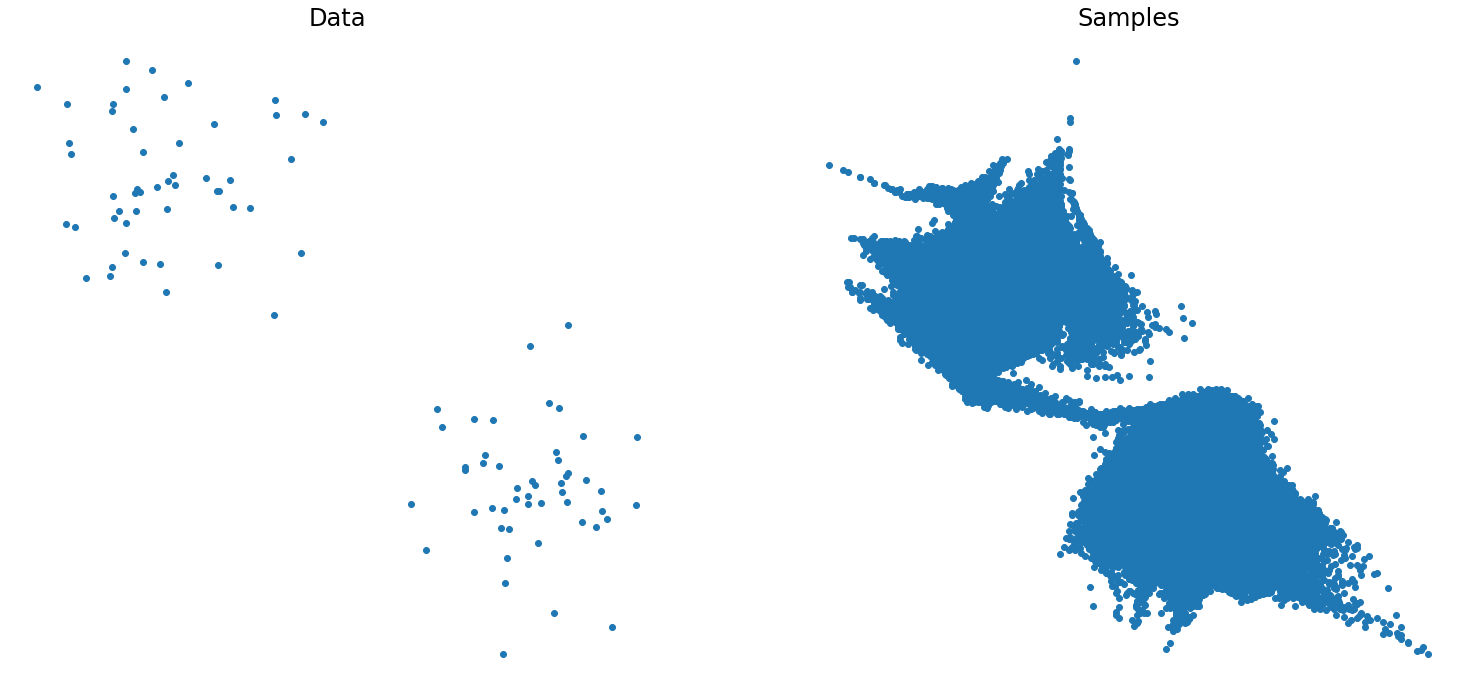

In [18]:
flow = flow.eval()
x_dash=flow.sample(128000)
# Plot model samples after training
plot_samples(test_dataloader,x_dash)

In [10]:
d=None
for x,y,data in test_dataloader:
    #print(x.shape)
    if d is not None:
        d=torch.cat((d,data),dim=0)
    else:
        d=data.clone()

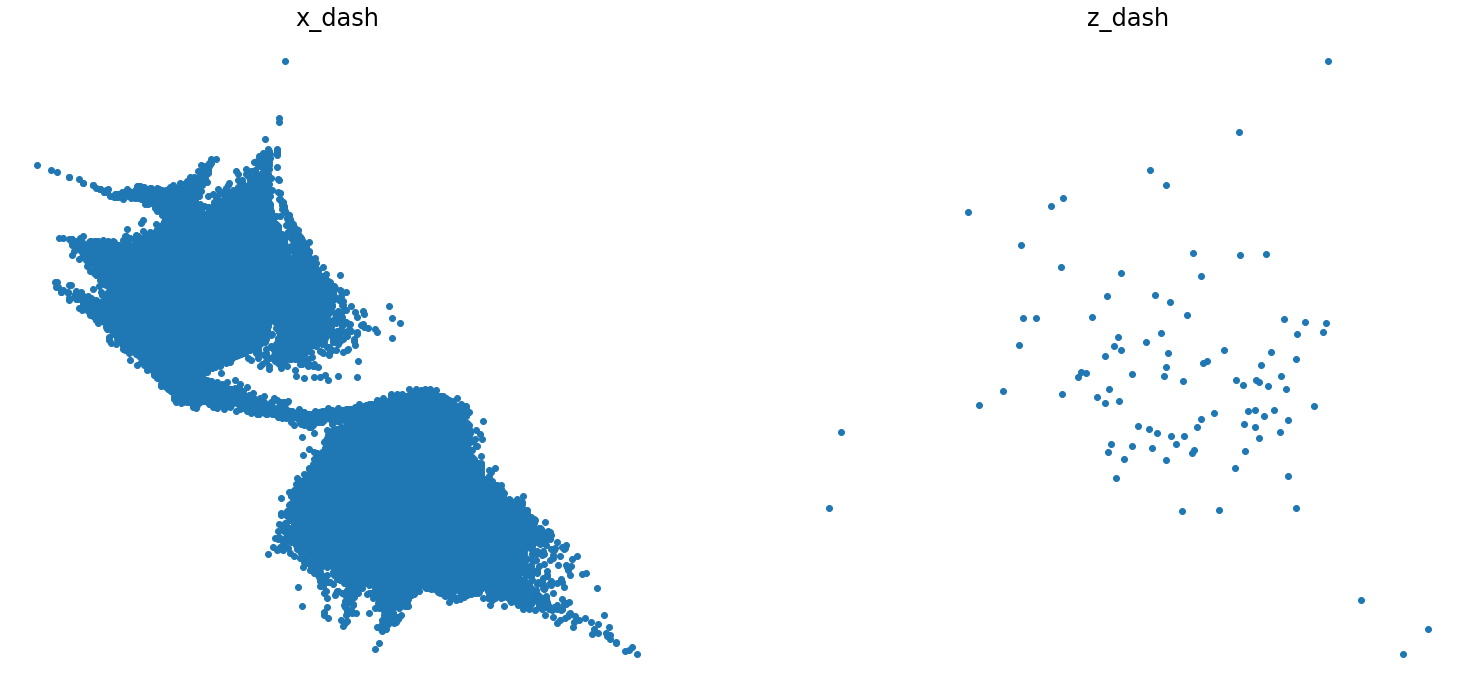

In [19]:
flow = flow.eval()
# inverse
z_dash=flow.prob(d.type(torch.float32))
plot_samples2(x_dash,z_dash)

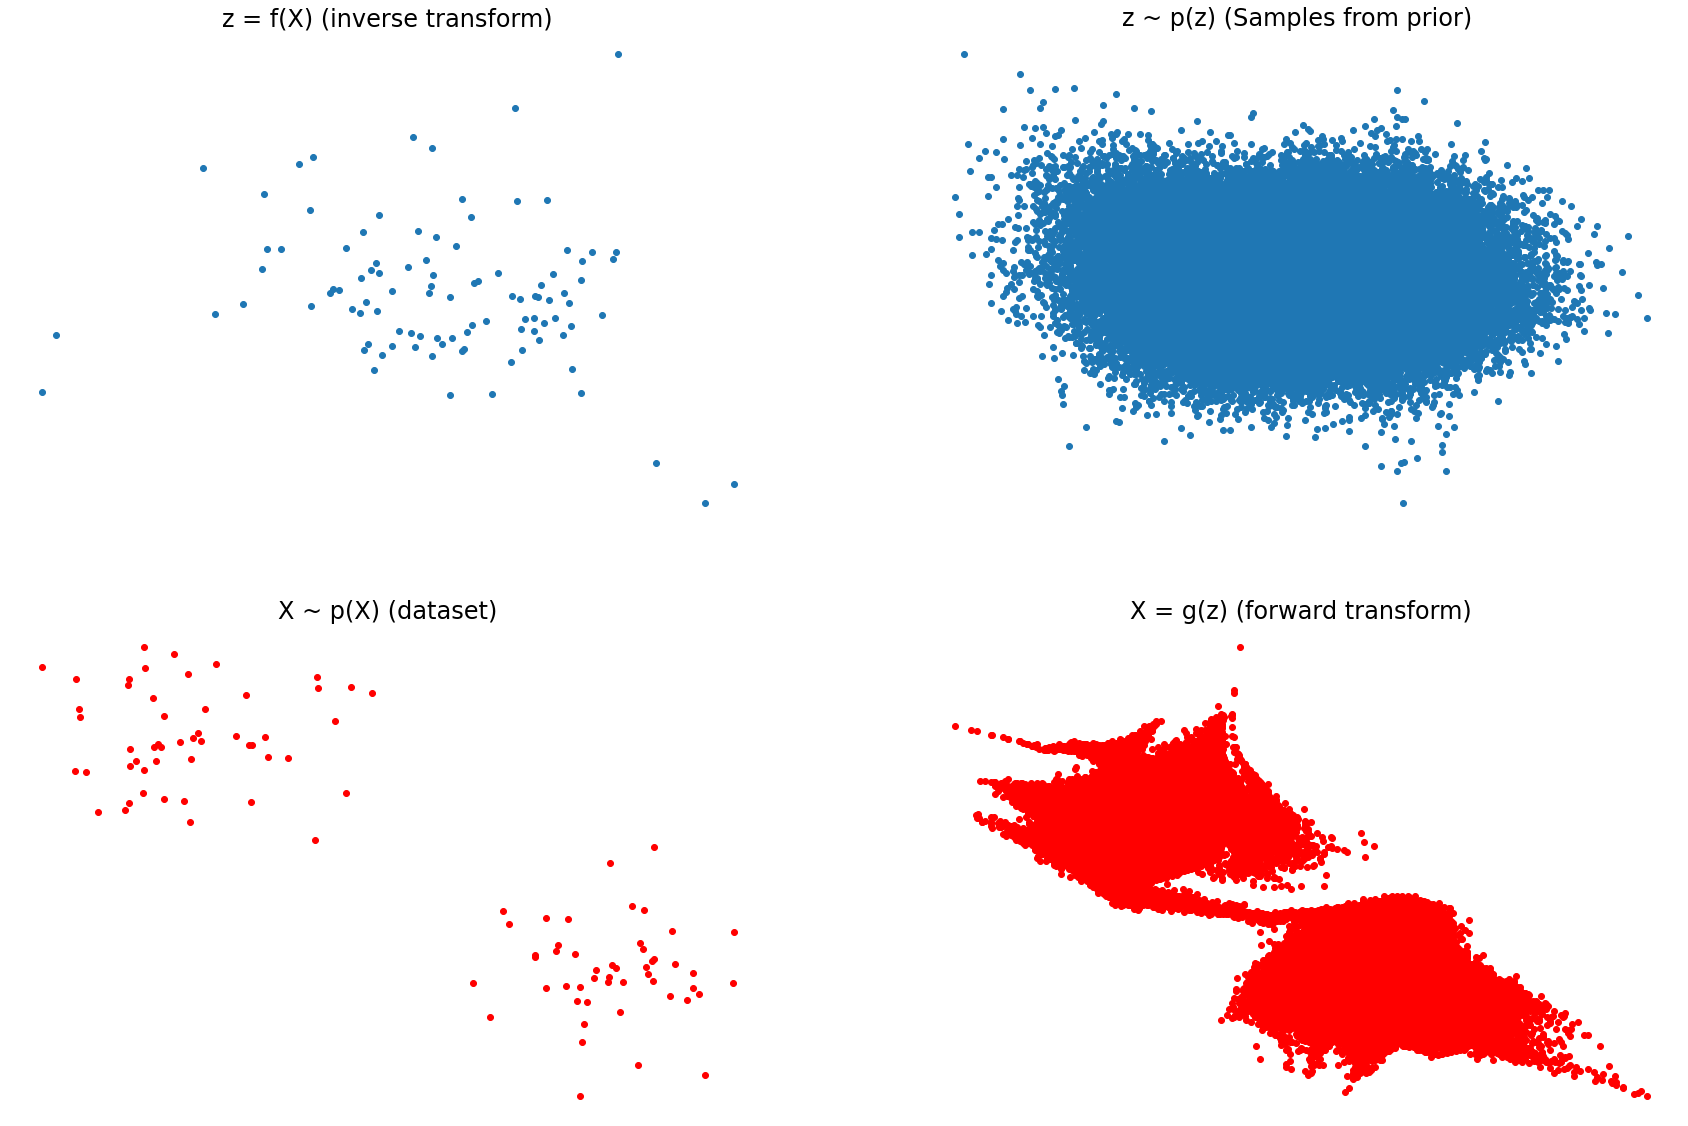

In [20]:
# create final 4 fig subplot
from Plot_utils import plot_final
plot_final(test_dataloader,initial_flow,x_dash,z_dash,'/Users/ssa195/Downloads/dt8122-2022-main/nvp_trained_2blobs/plot1.png')